In [31]:
# General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baseline Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Random Forest Imports
from sklearn.ensemble import RandomForestRegressor

# Decision Tree Imports
from sklearn.tree import DecisionTreeRegressor

# K-fold Validation Imports
from sklearn.model_selection import KFold, cross_val_score

In [40]:
data = pd.read_csv("crimedata2.csv", encoding="ISO-8859-1")
data = data.replace('?', np.nan)
data = data.dropna(subset=['ViolentCrimesPerPop'])

columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'medIncome', 'medFamInc', 'perCapInc', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'ViolentCrimesPerPop']
df = data[columns]
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

C:\Users\reach\AppData\Local\Temp\ipykernel_536\4262877011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


,agePct12t29,PctLess9thGrade,PctNotHSGrad,PctBSorMore,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,medIncome,medFamInc,perCapInc,PctSpeakEnglOnly,PctNotSpeakEnglWell,ViolentCrimesPerPop
0,21.44,5.81,9.90,48.18,11980,1.37,91.78,6.50,1.88,75122,79584,29711,85.68,1.37,41.02
1,21.30,5.61,13.72,29.89,23123,0.80,95.57,3.44,0.85,47917,55323,20148,87.79,1.81,127.56
2,25.88,2.80,9.09,30.13,29344,0.74,94.33,3.43,2.35,35669,42112,16946,93.11,1.14,218.59
3,25.20,11.05,33.68,10.81,16656,1.70,97.35,0.50,0.70,20580,26501,10810,94.98,0.56,306.64
5,32.89,8.76,23.03,20.66,140494,2.51,95.65,0.90,0.95,21577,27705,11878,96.87,0.60,442.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,30.16,17.12,30.87,15.79,56216,6.87,61.68,15.23,29.86,24727,27388,10237,65.33,11.87,545.75
2211,31.23,12.51,27.71,19.28,12251,21.18,76.65,1.52,1.29,20321,25000,9995,92.78,0.86,124.10
2212,20.96,7.82,26.14,12.42,32824,0.52,92.62,0.98,11.00,27182,34973,14131,88.95,1.70,353.83
2213,30.01,24.37,39.63,12.40,13547,3.37,69.91,0.90,62.11,19899,22103,8100,48.92,6.66,691.17


## Baseline

Average ViolentCrimesPerPop: 589.078921765296
Mean Squared Error: 348041.6146645915
Root Mean Squared Error: 589.9505188272924
R-Squared Score: -7.000089035669177e-05


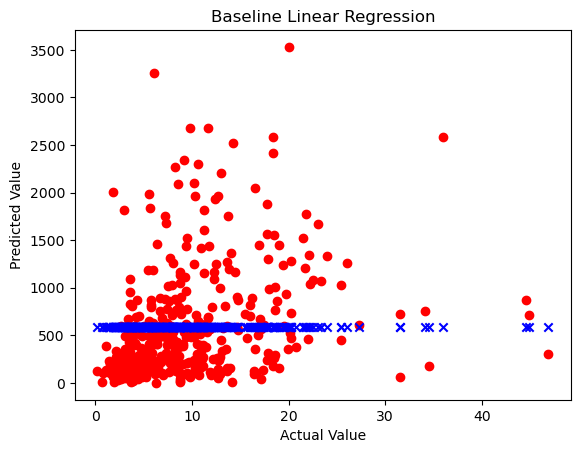

In [35]:
# Calculate Average ViolentCrimesPerPop for baseline
avgViolent = df['ViolentCrimesPerPop'].mean()
print('Average ViolentCrimesPerPop:', avgViolent)

# Add average to the dataset
df['AvgViolentCrimesPerPop'] = avgViolent

# Seperate Predictive and Target
X = df.drop(columns=['ViolentCrimesPerPop', 'AvgViolentCrimesPerPop'])
y = df['ViolentCrimesPerPop']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
baseline = LinearRegression().fit(X_train, y_train)
y_pred = df['AvgViolentCrimesPerPop'][:399] # Not optimal way to do this, but it works (was getting error without specific, CORRECT series length)

# Print Details
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print graph
# IMPORTANT: X-axis has wrong scale (gonna need to fix, but not currently sure how)
plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('Baseline Linear Regression')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Remove Average column from dataset to not impact future models
df = df.drop(columns=['AvgViolentCrimesPerPop'])

### Random Forest

Mean Squared Error: 144215.8477411631
Root Mean Squared Error: 379.75761709432913
R-Squared Score: 0.5856071891923056


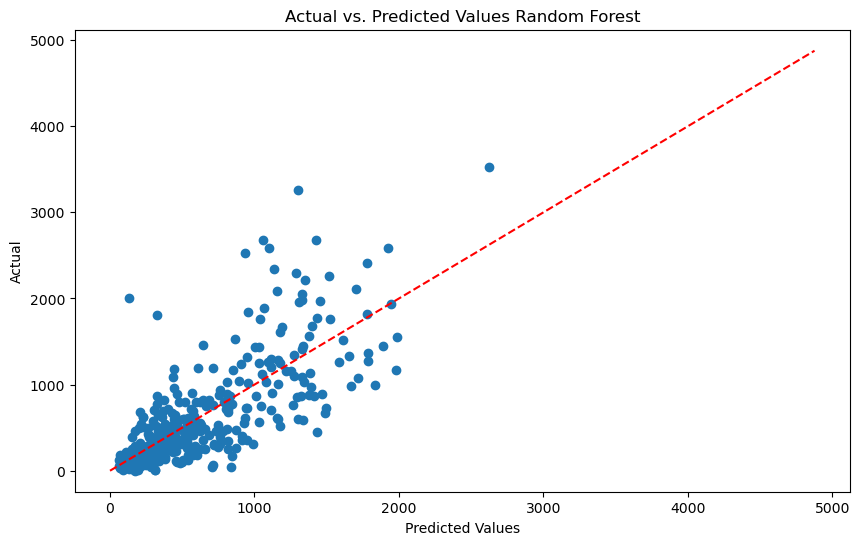

In [37]:
# Random Forest Model
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Accuracy Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

In [21]:
# Cross Validation with K-folds
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.59828403 0.66752568 0.54018525 0.57962747 0.48346177 0.62169106
 0.60901941 0.63136072 0.50197684 0.49123289]
Average CV Score:  0.5724365114197896
Number of CV Scores used in Average:  10


### Decision Tree

Mean Squared Error: 269990.61145338346
Root Mean Squared Error: 519.6062080589332
R-Squared Score: 0.22420337206864782


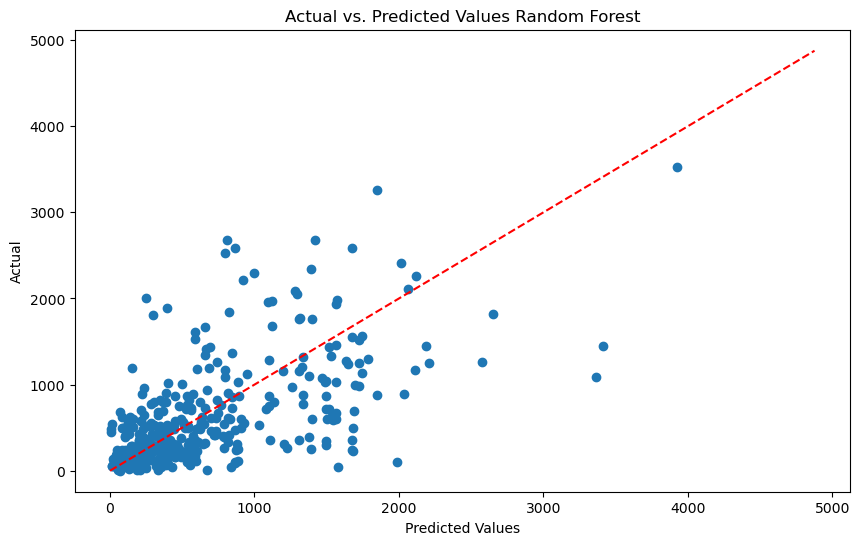

In [27]:
# Decision Tree Model
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Accuracy Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

In [23]:
# Cross Validation with K-folds
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.5830347  0.67295939 0.55809336 0.59517175 0.48610157 0.59589842
 0.62048127 0.63685234 0.50602682 0.48239042]
Average CV Score:  0.5737010035907959
Number of CV Scores used in Average:  10


### Linear Regression

Mean Squared Error: 159147.62381557413
Root Mean Squared Error: 398.9331069434751
R-Squared Score: 0.5427019138377431


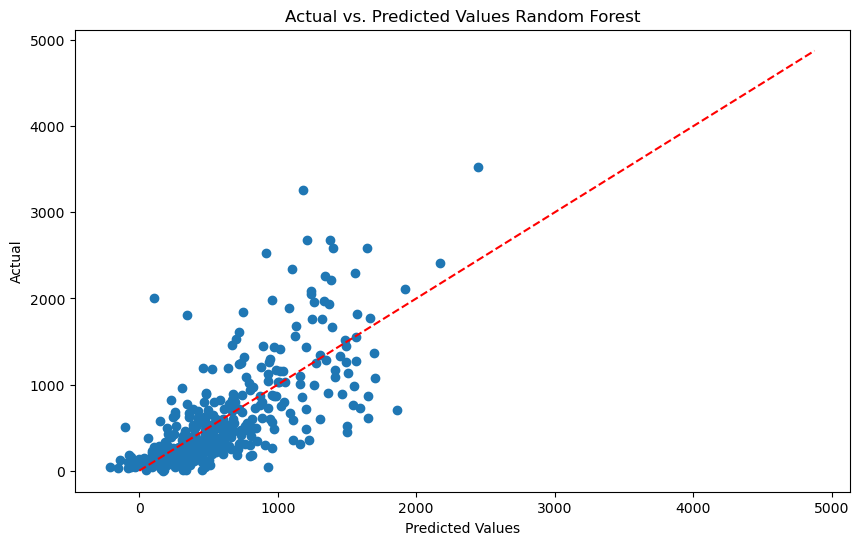

Coefficients: [ 3.42961857e-01 -5.49565014e+01  3.66068386e+01  5.27380507e+00
  2.15152278e-04  1.62727272e+01 -5.46230858e+00  5.35090049e+00
  7.06626188e+00  1.97388490e-03 -2.31407057e-02  3.40772334e-02
  4.61697467e+00  3.28007864e+01]
Intercept: 198.399882209839


In [38]:
# Linear Regression Model
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Accuracy Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

# Print Calculation Details
# Would like to include variable name with Coefficients
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

In [22]:
# Cross Validation with K-folds
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.57743326 0.65964296 0.54229746 0.57785349 0.48492786 0.58675016
 0.64285555 0.63545516 0.52515033 0.51139286]
Average CV Score:  0.5743759084649015
Number of CV Scores used in Average:  10
